In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

#特徵(懷孕次數、血糖、血壓、皮脂厚度、胰島素、BMI身體質量指數、糖尿病遺傳函式、年齡、結果）


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [4]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


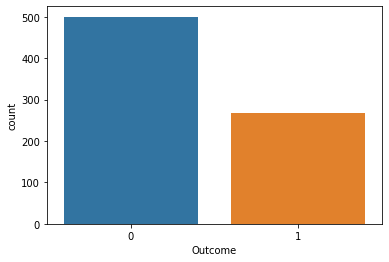

In [5]:
import seaborn as sns

sns.countplot(diabetes['Outcome'],label="Count")

In [7]:
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
from sklearn.model_selection import train_test_split
#測試訓練
x_train, x_test, y_train, y_test = train_test_split(diabetes.loc[:,diabetes.columns != 'Outcome'], diabetes['Outcome'],stratify=diabetes['Outcome'], random_state=66)

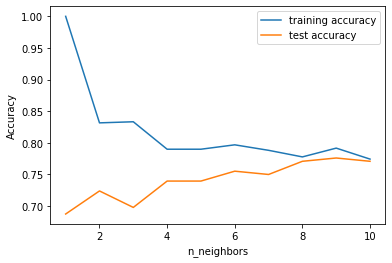

In [25]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))



    
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()



KNN

In [13]:
# select n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
print("Accuracy of K-NN classifier on training set: {:.2f}".format(knn.score(x_train, y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test, y_test)))


Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,knn.predict(x_test))
print(confusion_matrix)

[[108  17]
 [ 27  40]]


0.7305074626865672


<Figure size 432x288 with 0 Axes>

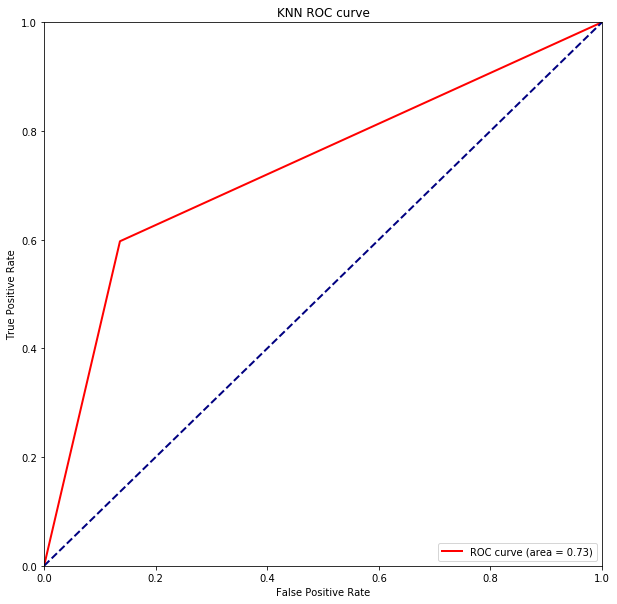

In [84]:
from sklearn.metrics import roc_curve, auc
fpr_lap,tpr_lap,threshold = roc_curve(y_test,knn.predict(x_test))
roc_auc_lap = auc(fpr_lap,tpr_lap)
print(roc_auc_lap)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_lap, tpr_lap, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lap)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.legend(loc="lower right")
plt.show()
# LogisticRegression.score(x_test,y_test2)
# roc_curve(y_test2,LogisticRegression.predict(x_test))

決策樹

In [14]:
from sklearn.tree import DecisionTreeClassifier
# decision tree
"""
The results show that the accuracy of the training set is 100%,
while the accuracy of the test set is only 74.1%. So the decision tree is over-fitting.
"""
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))



Preliminary results of decision tree fitting:
Accuracy on training set: 1.000
Accuract on test set: 0.714


In [15]:
# setting max_depth=3, limit the depth of the tree to reduce overfitting.
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("\nFinally results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))
# output the feature importance
print("Feature importance:\n{}".format(tree.feature_importances_))



Finally results of decision tree fitting:
Accuracy on training set: 0.773
Accuract on test set: 0.740
Feature importance:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


In [27]:
from sklearn.tree import DecisionTreeClassifier
# decision tree

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))



Preliminary results of decision tree fitting:
Accuracy on training set: 1.000
Accuract on test set: 0.714


In [31]:
#限制樹的深度来减少過度擬合
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("\nFinally results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))
print("Feature importance:\n{}".format(tree.feature_importances_))


Finally results of decision tree fitting:
Accuracy on training set: 0.773
Accuract on test set: 0.740
Feature importance:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


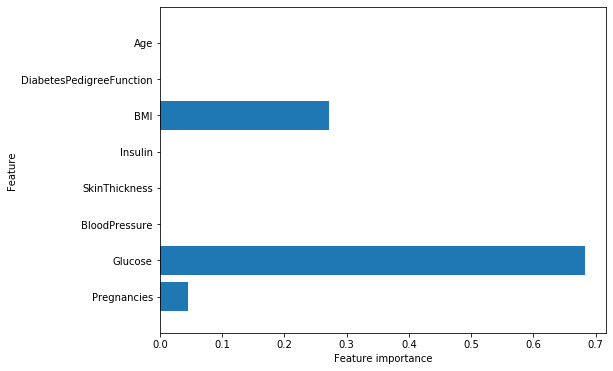

In [42]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')
#血糖為重要特徵

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,tree.predict(x_test))
print(confusion_matrix)

[[100  25]
 [ 25  42]]


0.7134328358208956


<Figure size 432x288 with 0 Axes>

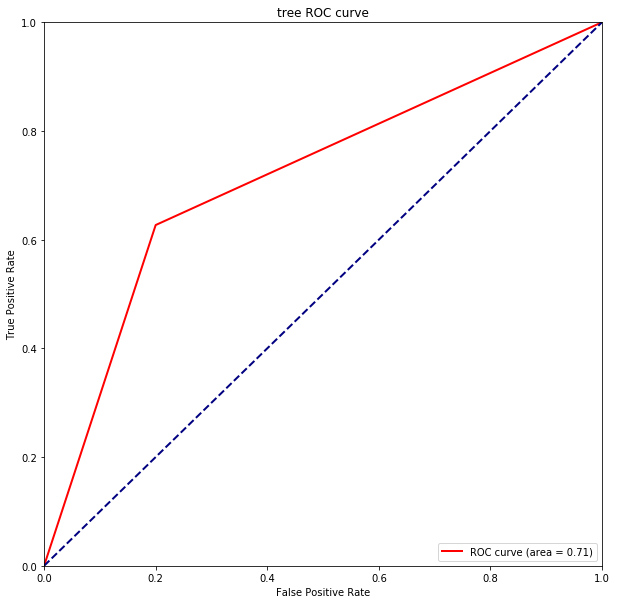

In [85]:
from sklearn.metrics import roc_curve, auc
fpr_lap,tpr_lap,threshold = roc_curve(y_test,tree.predict(x_test))
roc_auc_lap = auc(fpr_lap,tpr_lap)
print(roc_auc_lap)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_lap, tpr_lap, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lap)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('tree ROC curve')
plt.legend(loc="lower right")
plt.show()
# LogisticRegression.score(x_test,y_test2)
# roc_curve(y_test2,LogisticRegression.predict(x_test))

隨機森林

In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))




Preliminary results of decision tree fitting:
Accuracy on training set: 1.000
Accuracy on test set: 0.786


In [45]:
# now, the max_depth = 3
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("\nFinally results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))



Finally results of decision tree fitting:
Accuracy on training set: 0.800
Accuracy on test set: 0.755


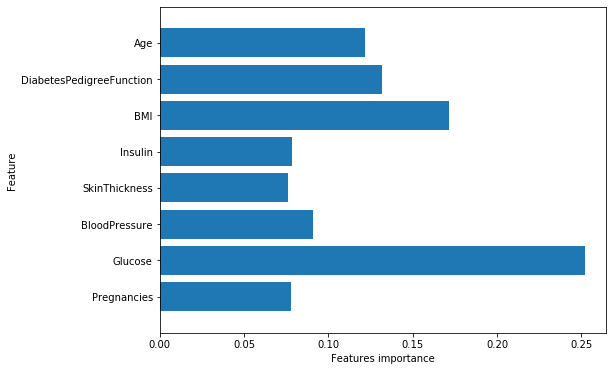

In [46]:
plot_feature_importances_diatebes(rf)

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,rf.predict(x_test))
print(confusion_matrix)

[[106  19]
 [ 22  45]]


0.759820895522388


<Figure size 432x288 with 0 Axes>

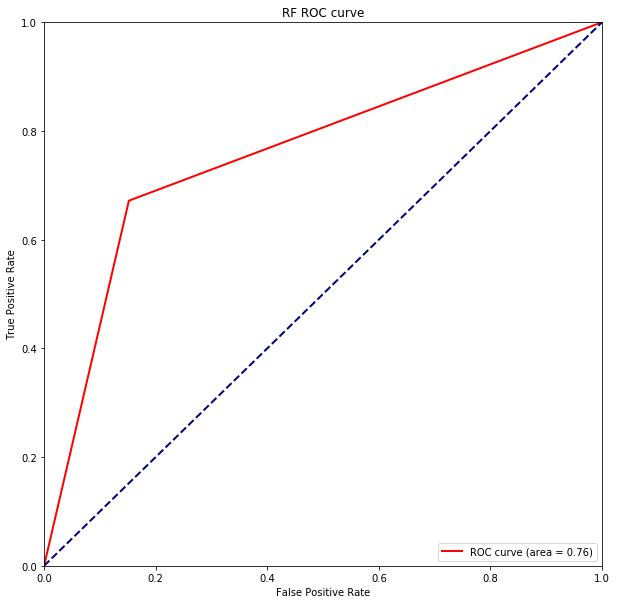

In [69]:
from sklearn.metrics import roc_curve, auc
fpr_lap,tpr_lap,threshold = roc_curve(y_test,rf.predict(x_test))
roc_auc_lap = auc(fpr_lap,tpr_lap)
print(roc_auc_lap)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_lap, tpr_lap, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lap)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC curve')
plt.legend(loc="lower right")
plt.show()
# LogisticRegression.score(x_test,y_test2)
# roc_curve(y_test2,LogisticRegression.predict(x_test))